## The main guarantee that this notebook solves is to show basic knowledge of data analysis tools.
### Steps:
- Visual Data analysis
- Basic features cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('train.csv', sep=',')

### Visual Data Analysis

In [3]:
data.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
599,600,160,RM,24.0,1950,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,7,2008,COD,Normal,151000
402,403,30,RL,60.0,10200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,8,2008,WD,Normal,108000
13,14,20,RL,91.0,10652,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,New,Partial,279500
1265,1266,160,FV,35.0,3735,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2006,WD,Normal,183900
667,668,20,RL,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,WD,Normal,193500


In [4]:
data.shape

(1460, 81)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Key indicator analysis "SalePrice" (according to business task)

In [6]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

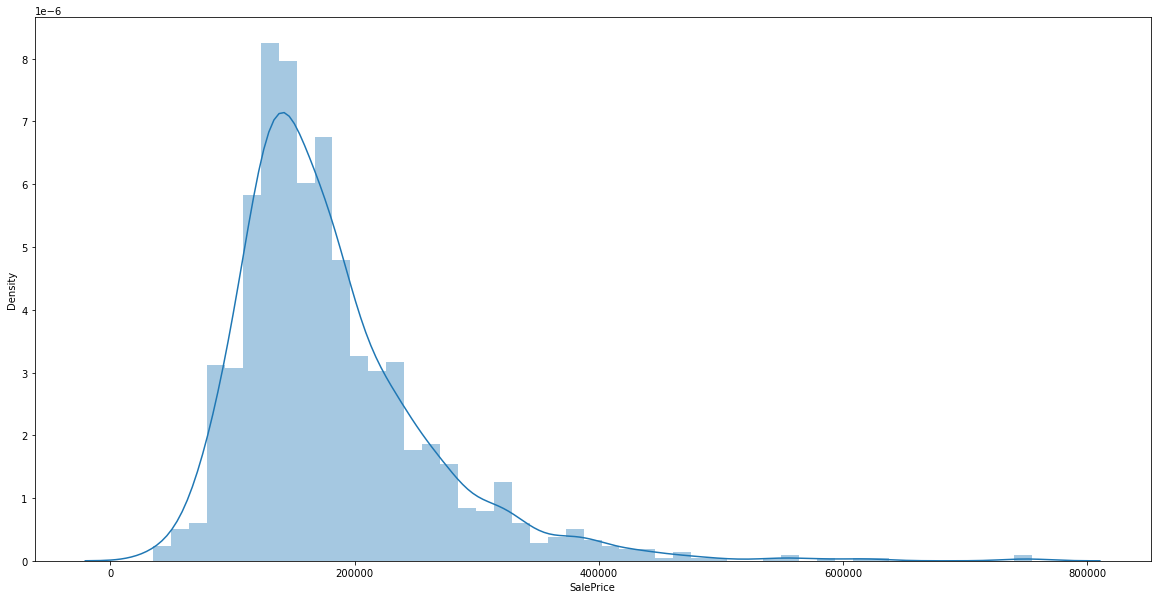

In [7]:
price_fig, price_ax = plt.subplots(figsize=(20,10))
price_ax = sb.distplot(data['SalePrice'])
price_ax

### Features Preparation

- Eliminate features that contain more than 99% of the predominant values

In [8]:
predominant_value_threshold = 99
to_drop = []

for column in data.columns:
    most_frequent_value = data[column].mode().iloc[0]
    most_frequent_value_repetitions = data[column].value_counts().iloc[0]
    most_frequent_value_perc = most_frequent_value_repetitions / len(data) * 100
    
    if most_frequent_value_perc > predominant_value_threshold:
        to_drop.append(column)
        
data.drop(columns=to_drop, inplace=True)

### Estimating the distribution null vaules

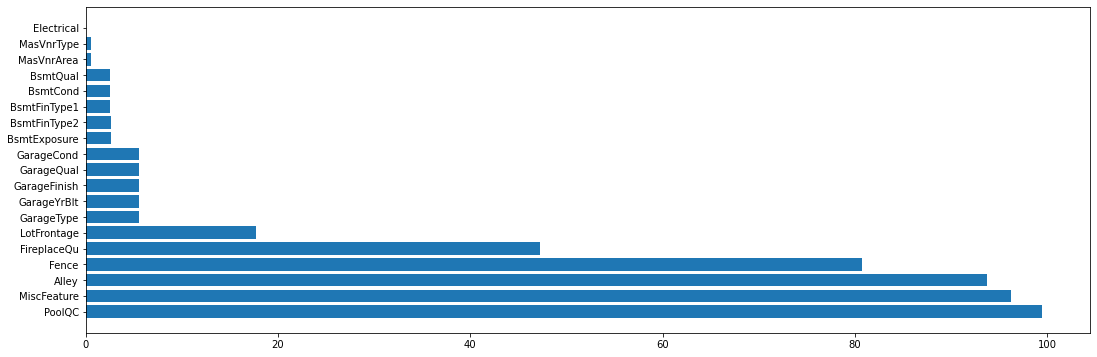

In [11]:
predicted_feature = 'salePrice'

missing_perc = (data.isnull().sum() / len(data)) * 100
missing_perc = missing_perc[(missing_perc.index != predicted_feature) & (missing_perc > 0)]
missing_perc.sort_values(inplace=True, ascending=False)

# Creating figure
null_fig, null_ax = plt.subplots()
null_ax.barh(missing_perc.index, missing_perc)
null_ax.set_facecolor('white')
null_fig.set_facecolor('white')
null_fig.set_figwidth(18)
null_fig.set_figheight(6)

#### IMPORTANT: This method was used as an example. It is permissible to exclude features if the data doesn't carry the load for solving the problem (irrelevant from the point of view of business analysis).
- Drop columns that contain more than 80% null values. I consider it acceptable for analysis.

In [12]:
high_null_columns = missing_perc.index[missing_perc > 80]
data.drop(columns = high_null_columns, inplace =True)

### Quantitive and qualitive

In [13]:
quant_values = [col for col in data.columns if data.dtypes[col] != 'object']
qualit_values = [col for col in data.columns if data.dtypes[col] == 'object']

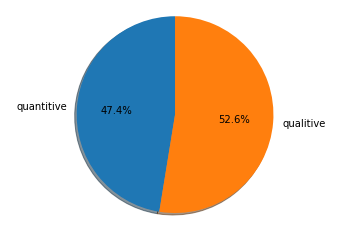

In [10]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'quantitive', 'qualitive'
sizes = [len(quant_values), len(qualit_values)]

qn_fig, qn_ax = plt.subplots()
qn_ax.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
qn_ax.axis('equal')
plt.show()

- Those features that contain <20% null values are filled with median. For quaininty features only.

In [14]:
for column in quant_values:
    median_value = data[column].median()
    data[column] = data[column].apply(lambda x: median_value if x == None else x)

### Let's evaluate outliers.
- First of all visual research

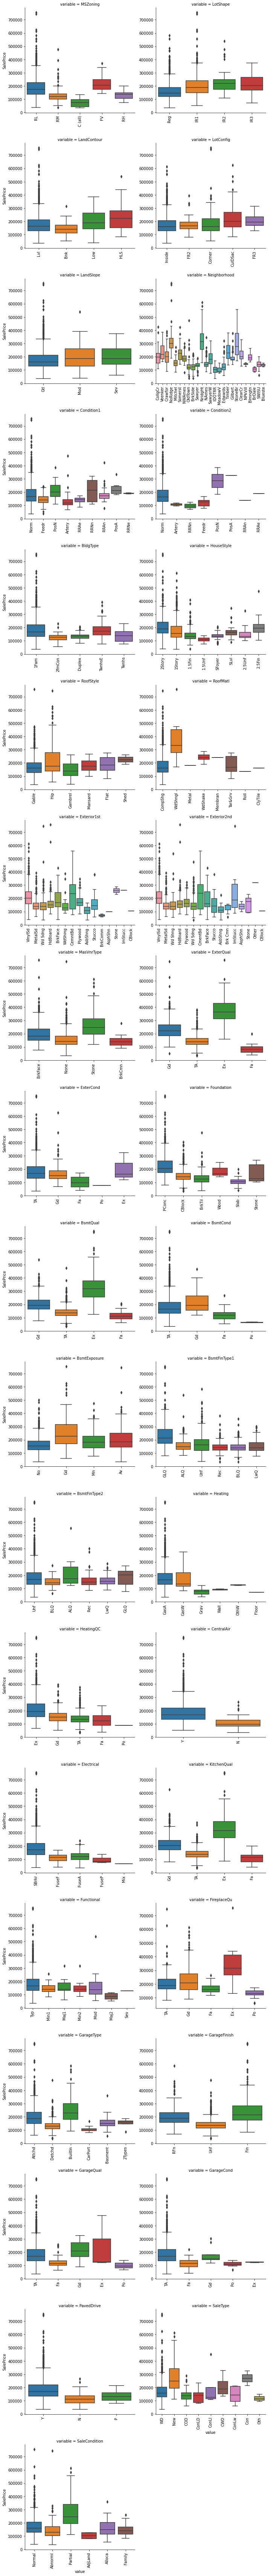

In [15]:
def boxplot(x, y, **kwargs):
    sb.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

outliers_figure = pd.melt(data, id_vars=['SalePrice'], value_vars=qualit_values)
grid = sb.FacetGrid(outliers_figure, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
grid = grid.map(boxplot, "value", "SalePrice")

### Skewness values

In [16]:
skewness_df = pd.DataFrame(columns=['column', 'skew', 'quantile_low', 'quantile_high'])
for column in quant_values:
    skew = data[column].skew()
    quantile_low = data[column].quantile(0.10)
    quantile_high = data[column].quantile(0.90)
    skewness_df = skewness_df.append({'column':column, 'skew':skew, 'quantile_low':quantile_low, 'quantile_high':quantile_high}, ignore_index=True)
skewness_df

,column,skew,quantile_low,quantile_high
0,Id,0.000000,146.9,1314.1
1,MSSubClass,1.407657,20.0,120.0
2,LotFrontage,2.163569,44.0,96.0
3,LotArea,12.207688,5000.0,14381.7
4,OverallQual,0.216944,5.0,8.0
5,OverallCond,0.693067,5.0,7.0
6,YearBuilt,-0.613461,1924.9,2006.0
7,YearRemodAdd,-0.503562,1950.0,2006.0
8,MasVnrArea,2.669084,0.0,335.0
9,BsmtFinSF1,1.685503,0.0,1065.5


### Replacing outliers with median values

In [17]:
for column in quant_values:
    quantile_low = data[column].quantile(0.50)
    quantile_high = data[column].quantile(0.95)
    data[column] = np.where(data[column] > quantile_high, quantile_low, data[column])

- As an example let's encode one of the feature. BTW we are able to user get_dummies, but the results may be dubious) 

In [18]:
# Encoding featrue example
data = data.replace({"MoSold":{
                            1 : "Jan",
                            2 : "Feb",
                            3 : "Mar",
                            4 : "Apr",
                            5 : "May",
                            6 : "Jun",
                            7 : "Jul",
                            8 : "Aug",
                            9 : "Sep",
                            10 : "Oct",
                            11 : "Nov",
                            12 : "Dec"
                        }
                    })

### Lets look through the results

- SalePrice Correlation Matrix

<AxesSubplot:>

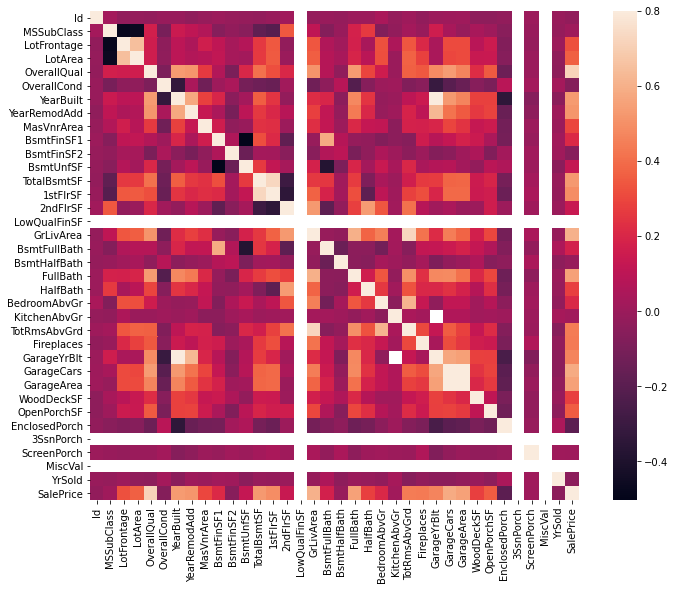

In [19]:
#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sb.heatmap(corrmat, vmax=.8, square=True)

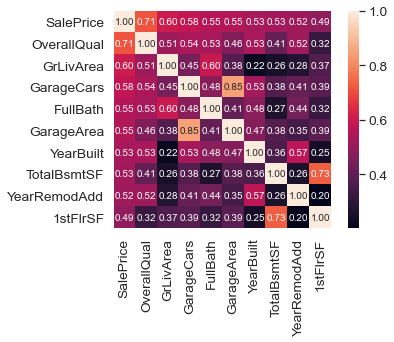

In [20]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[cols].values.T)
sb.set(font_scale=1.25)
hm = sb.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Short Conclusion

As part of the work done, we considered the primary options for data processing, which are key in identifying features. Of course, this is a difficult and painstaking process, especially when there is no well-built pipeline within the subject area.

#### Next steps:
- The definition of features that cannot be explicitly identified through data mining, they are directly tied to the business area.
- Iterative exploration of proposed solutions
- Evaluation of the effectiveness of the proposed scenarios in battle